In [2]:
import pandas as pd
from fuzzywuzzy import fuzz
import warnings
warnings.filterwarnings('default')

df_food_banks = pd.read_csv('food_pantries_1.csv', encoding='ISO-8859-1')

food_banks_addresses = pd.concat([df_food_banks['Address 1'], df_food_banks['Address 2'], df_food_banks['Address 3']])
df_full_addresses = pd.read_csv('all_fp_address.csv', header=None, encoding='ISO-8859-1')  # Assumes no header in this file
matches = 0
df_fb = []
df_all = []
for fb_address in food_banks_addresses:
    for full_address in df_full_addresses[0]:
        if fuzz.ratio(fb_address, full_address) > 70:
            matches += 1
            print(fb_address)
            print(full_address)
            df_fb.append(fb_address)
            df_all.append(full_address)
            break  

recall = matches / 150  # Assume the total positive cases is 150
print('Recall:', recall)



107 Walter Davis Dr, Birmingham, AL 35209, United States
107 Walter Davis Drive Birmingham, AL 35209
2192 Viking Dr, Anchorage, AK 99501, United States
2192 Viking Dr, Anchorage, AK 99501
2831 N 31st Ave, Phoenix, AZ 85009, United States
2831 N 31st Avenue Phoenix, AZ 85009
4301 W 65th St, Little Rock, AR 72209, United States
4301 W 65th Street Little Rock, AR 72209
10700 E 45th Ave, Denver, CO 80239, United States
10700 East 45th Avenue Denver, CO 80239
222 Lake Dr, Newark, DE 19702, United States
222 Lake Dr, Newark, DE 19702
3400 N Desert Dr, East Point, GA 30344, United States
3400 N Desert Dr, East Point, GA 30344
2611 Kilihau St, Honolulu, HI 96819, United States
2611 Kilihau St, Honolulu, HI 96819
3630 E Commercial Ct, Meridian, ID 83642, United States
3630 E. Commercial Court Meridian, ID 83642
6450 S Belmont Ave, Indianapolis, IN 46217, United States
6450 S Belmont Street Indianapolis, IN 46217
2220 E 17th St, Des Moines, IA 50316, United States
2220 E 17th Street Des Moines, 

6490 Broadway, Merrillville, IN 46410, United States
6490 Broadway Merrillville, IN 46410
1605 Lafayette St, Waterloo, IA 50703, United States
1605 Lafayette Street Waterloo, IA 50703
307 W Pecan St, Independence, KS 67301, United States
307 W Pecan Street Independence, KS 67301
10100 Toebben Dr, Independence, KY 41051, United States
10100 Toebben Dr, Independence, KY 41051
3223 Baldwin Ave, Alexandria, LA 71301, United States
3223 Baldwin Ave Alexandria, LA 71301
161 Mt Vernon Ave, Augusta, ME 04330, United States
161 Mt Vernon Ave, Augusta, ME 04330
9385 Gerwig Ln J, Columbia, MD 21046, United States
9385 Gerwig Lane Columbia, MD 21046
12 Mudge Way, Bedford, MA 01730, United States
12 Mudge Way STE 1, Bedford, MA 01730
2300 Lapeer Rd, Flint, MI 48503, United States
2300 Lapeer Rd. Flint, MI 48503
131 35th St SE, Rochester, MN 55904, United States
131 35th Street SE Rochester, MN 55904
21081 Johnson Rd, Long Beach, MS 39560, United States
21081 Johnson Road Long Beach, MS 39560
2024 K

In [3]:

df_common = pd.DataFrame({
    'fp_in_150': df_fb,
    'fp_in_all': df_all,
})

# Write the DataFrame to a csv file
df_common.to_csv('fb_in_common_1.csv', index=False)


In [4]:
print(matches)
# Note that the above is the fuzzy matching, after we did a manual check, we neeed to subtract 3
recall = (matches-3) / 150  
print('Recall:', recall)

124
Recall: 0.8066666666666666


In [5]:
import pandas as pd
from fuzzywuzzy import fuzz

df_xlsx = pd.read_excel('food_pantries_2.xlsx', header = None)
addresses_xlsx = []

for index, row in df_xlsx.iterrows():
    for col in df_xlsx.columns[1:]:  # Assuming columns 2, 3, and 4 contain the addresses
        if pd.notna(row[col]):
            address = row[col].split(' - ')[-1]  # Split by ' - ' and take the last part
            addresses_xlsx.append(address)

df_full_addresses = pd.read_csv('all_fp_address.csv', header=None, encoding='ISO-8859-1') 
matches = 0
df_fb = []
df_all = []
for fb_address in addresses_xlsx:
    for full_address in df_full_addresses[0]:
        if fuzz.ratio(fb_address, full_address) > 80:
            matches += 1
            print(fb_address)
            print(full_address)
            df_fb.append(fb_address)
            df_all.append(full_address)
            break  

recall = matches / 150  # Assume the total positive cases is 150
print('Recall:', recall)


107 Walter Davis Dr, Birmingham, AL
107 Walter Davis Drive Birmingham, AL 35209
2000 Vernon Ave SW, Huntsville, AL
2000 Vernon Avenue Huntsville, AL 35805
2192 Viking Dr, Anchorage, AK 99501
2192 Viking Dr, Anchorage, AK 99501
3710E 20th Ave, Anchorage, AK
3600 E 20th Ave, Anchorage, AK 99508
906 W Peoria Ave, Phoenix, AZ
906 W. Peoria Ave Phoenix, AZ 85029
5605 N 55th Ave, Glendale, AZ
6205 N 51st Ave, Glendale, AZ 85301
2831 N 31st Ave, Phoenix, AZ
2831 N 31st Avenue Phoenix, AZ 85009
4301 W 65th St, Little Rock, AR
4301 W 65th Street Little Rock, AR 72209
342 N Stadium Dr, Fayetteville, AR
324 Stadium Dr, Fayetteville, AR 72701
3100 Venice Blvd., Los Angeles, CA
3100 Venice Blvd Los Angeles, CA 90019
1444 SAn Francisco Ave, Long Beach, CA
1444 San Francisco Ave, Long Beach, CA 90813
10700 E 45th Ave, Denver, CO
10700 East 45th Avenue Denver, CO 80239
5400 S Yosemite St, Greenwood Village, CO
5400 S. Yosemite Street Greenwood Village, CO 80111
54 S Canal St, Plainville, CT
54 S Canal

2225 Eastern Ave, Plymouth, WI
2225 Eastern Avenue Plymouth, WI 53073
900 Central Ave, Cheyenne, WY
900 Central Avenue Cheyenne, WY 82007
Recall: 0.7933333333333333


In [6]:
df_common = pd.DataFrame({
    'fp_in_150': df_fb,
    'fp_in_all': df_all,
})

# Write the DataFrame to a csv file
df_common.to_csv('fb_in_common_2.csv', index=False)

In [7]:
# Note that the above is the fuzzy matching, after we did a manual check, the matches should be 109
recall = (109) / 150  
print('Recall:', recall)

Recall: 0.7266666666666667


Since we are using fuzzy matching, the results might not be 100% correct, we did a manul check for the matches for the two datasets, detailed info for missing FPs can be found in `missing_fps_details_1.csv` and `missing_fps_details_1.csv`. The checked files are named `fp_in_common_1_checked` and `fp_in_common_2_checked`.

### Find the duplicates inside those two 150 food pantries and calculate the recall for the merged dataset

In [8]:
df_food_banks = pd.read_csv('food_pantries_1.csv', encoding='ISO-8859-1')
food_banks_addresses = pd.concat([df_food_banks['Address 1'], df_food_banks['Address 2'], df_food_banks['Address 3']]).dropna().tolist()
food_pantries_2_addresses = pd.read_excel('food_pantries_2.xlsx', header=None)
addresses_xlsx = []

for index, row in food_pantries_2_addresses.iterrows():
    for col in food_pantries_2_addresses.columns[1:]:  # columns 2, 3, and 4 contain the addresses
        if pd.notna(row[col]):
            address = row[col].split(' - ')[-1]  
            addresses_xlsx.append(address)

merged_addresses = food_banks_addresses.copy()

for fb_address_2 in addresses_xlsx:
    is_duplicate = False
    for fb_address_1 in food_banks_addresses:
        if fuzz.ratio(fb_address_1, fb_address_2) > 70:
            is_duplicate = True
            break
    if not is_duplicate:
        merged_addresses.append(fb_address_2)

df_merged = pd.DataFrame(merged_addresses, columns=['Addresses'])
df_merged.to_csv('merged_addresses.csv', index=False)


In [9]:
import pandas as pd
from fuzzywuzzy import fuzz
fb_in_common_1 = pd.read_csv('fb_in_common_1_checked.csv', encoding='ISO-8859-1')
fb_in_common_2 = pd.read_csv('fb_in_common_2_checked.csv', encoding='ISO-8859-1')

merged_addresses = []
added_addresses = set()  


for address in fb_in_common_1['fp_in_all']:
    merged_addresses.append(address)
    added_addresses.add(address)

#  add addresses from fb_in_common_2 only if they're not "fuzzy duplicates" of addresses already added
for address_2 in fb_in_common_2['fp_in_all']:
    is_duplicate = False
    for added_address in added_addresses:
        if fuzz.ratio(address_2, added_address) > 85:
            is_duplicate = True
            break
    if not is_duplicate:
        merged_addresses.append(address_2)
        added_addresses.add(address_2)

df_merged = pd.DataFrame(merged_addresses, columns=['fp_in_all'])
df_merged.to_csv('merged_addresses_in_common.csv', index=False)



# Supplementary Figure 1 (a)

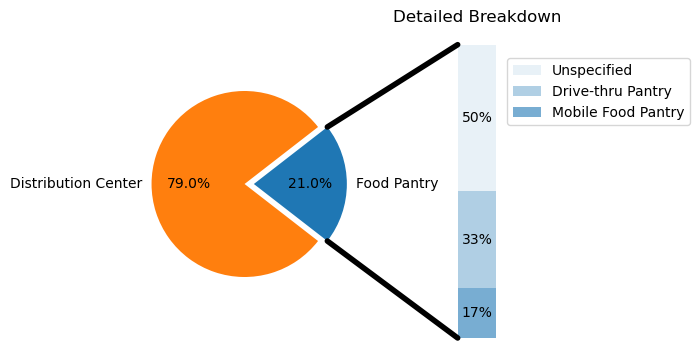

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.21, .79]
labels = ['Food Pantry', 'Distribution Center']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
pantry_ratios = [.17, .33, .50]
pantry_labels = ['Mobile Food Pantry', 'Drive-thru Pantry', 'Unspecified']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(pantry_ratios, pantry_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Detailed Breakdown')
ax2.legend(loc='center left', bbox_to_anchor=(0.6, 0.8))
ax2.axis('off')
ax2.set_xlim(- 3 * width, 3 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(pantry_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)


plt.show()

# Supplementary Figure 1 (b)

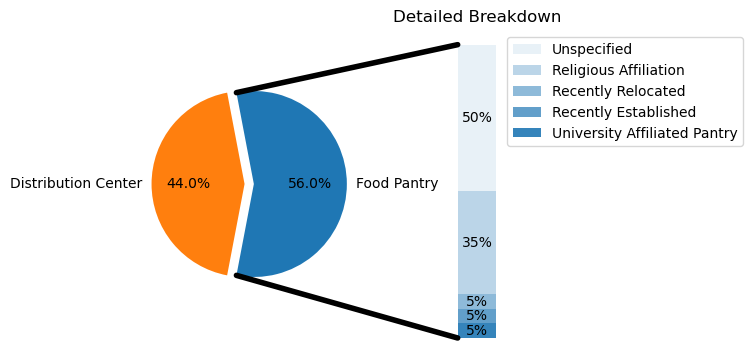

In [11]:

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.56, .44]
labels = ['Food Pantry', 'Distribution Center']
explode = [0.1, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
pantry_ratios = [.05, .05, .05, .35, .50]
pantry_labels = ['University Affiliated Pantry', 'Recently Established','Recently Relocated','Religious Affiliation', 'Unspecified']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(pantry_ratios, pantry_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.2 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Detailed Breakdown')
ax2.legend(loc='center left', bbox_to_anchor=(0.6, 0.8))
ax2.axis('off')
ax2.set_xlim(- 3 * width, 3 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(pantry_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()